In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import chi2_contingency

import os

data = pd.read_csv('C:/Users/dell/Desktop/mcdonalds.csv')

print(data.head)



<bound method NDFrame.head of      yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gende

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [28]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [30]:
print(pd.isnull(data).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [59]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

cramers_v_score = cramers_v(data['Age'], data['Like'])
print("Cramér's V:", cramers_v_score)

Cramér's V: 0.20586608307654256


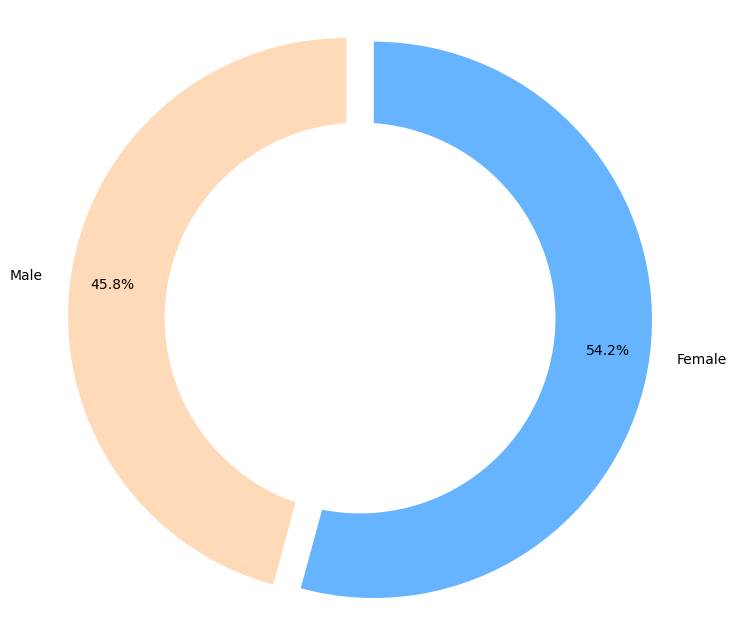

In [61]:
labels = ['Male','Female']
sizes = [data.query('Gender == "Male"').Gender.count(),data.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

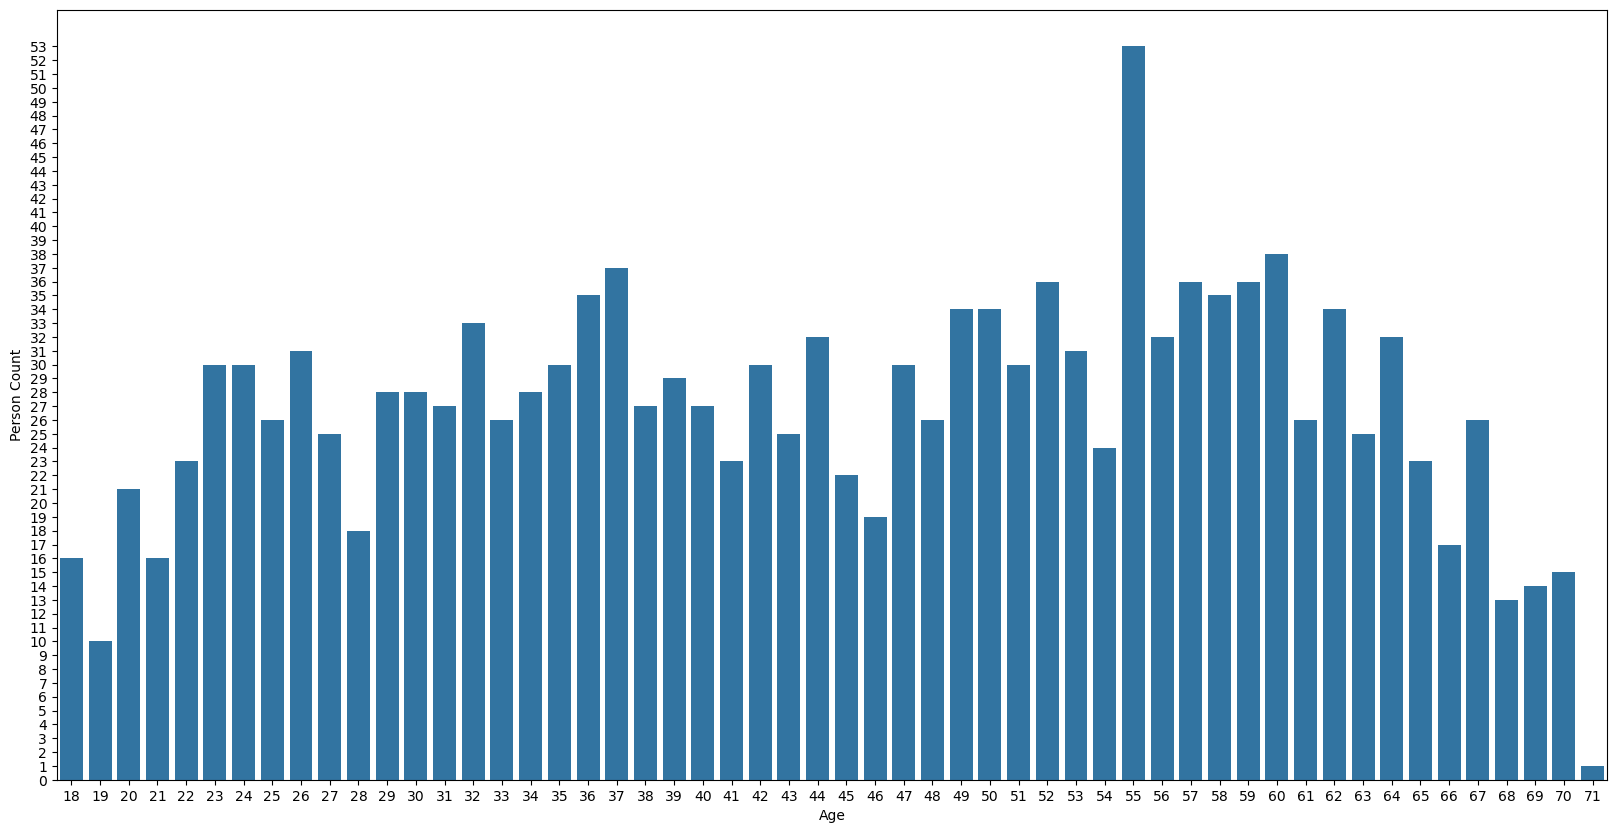

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data = data.dropna(subset=['Age'])
plt.figure(figsize=(20, 10))
sns.countplot(data=data, x='Age')

plt.xlabel("Age")
plt.ylabel("Person Count")

max_count = data['Age'].value_counts().max()  
plt.yticks(np.arange(0, max_count + 1, step=1)) 

plt.show()


<Figure size 2000x700 with 0 Axes>

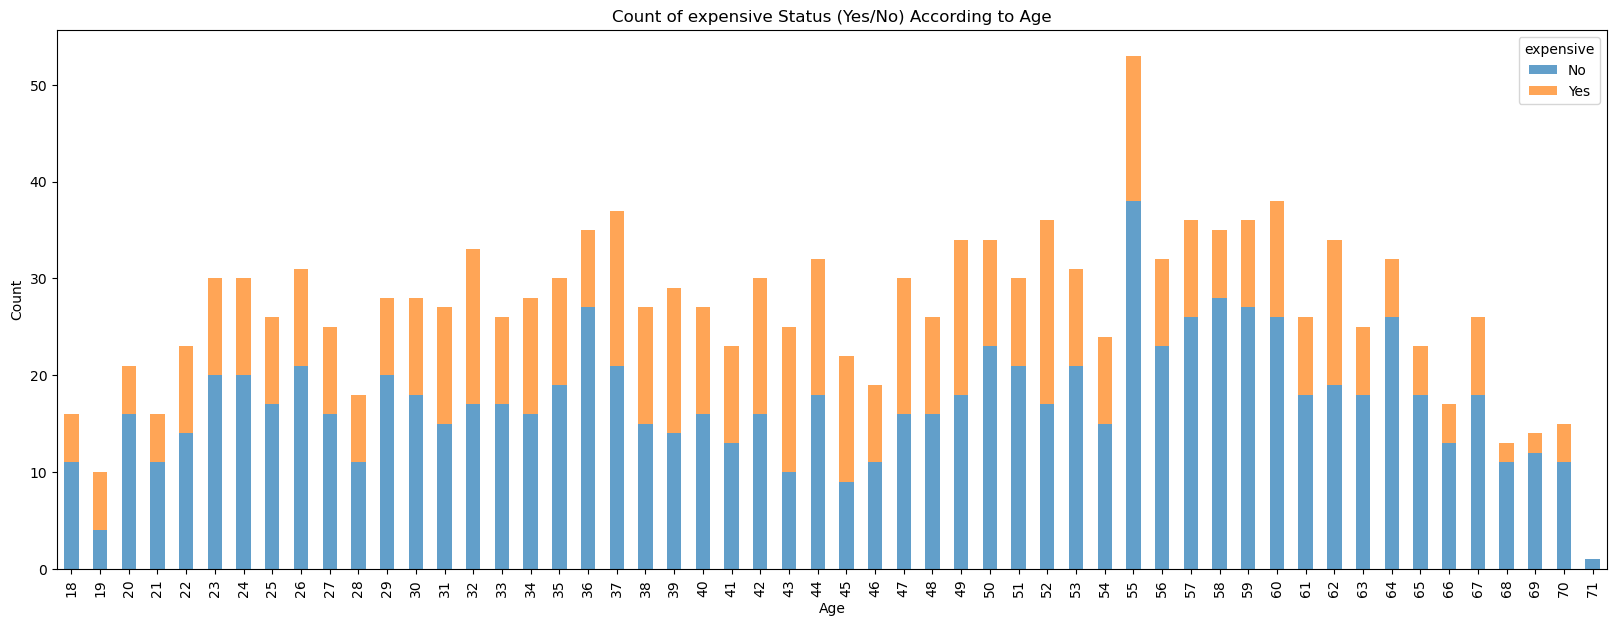

In [233]:
import matplotlib.pyplot as plt
import pandas as pd


healthy_count = data.groupby(['Age', 'expensive']).size().unstack(fill_value=0)

plt.figure(figsize=(20,7))
healthy_count.plot(kind='bar', stacked=True, alpha=0.7, figsize=(20,7))

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count of expensive Status (Yes/No) According to Age")
plt.legend(title="expensive", labels=["No", "Yes"])
plt.show()


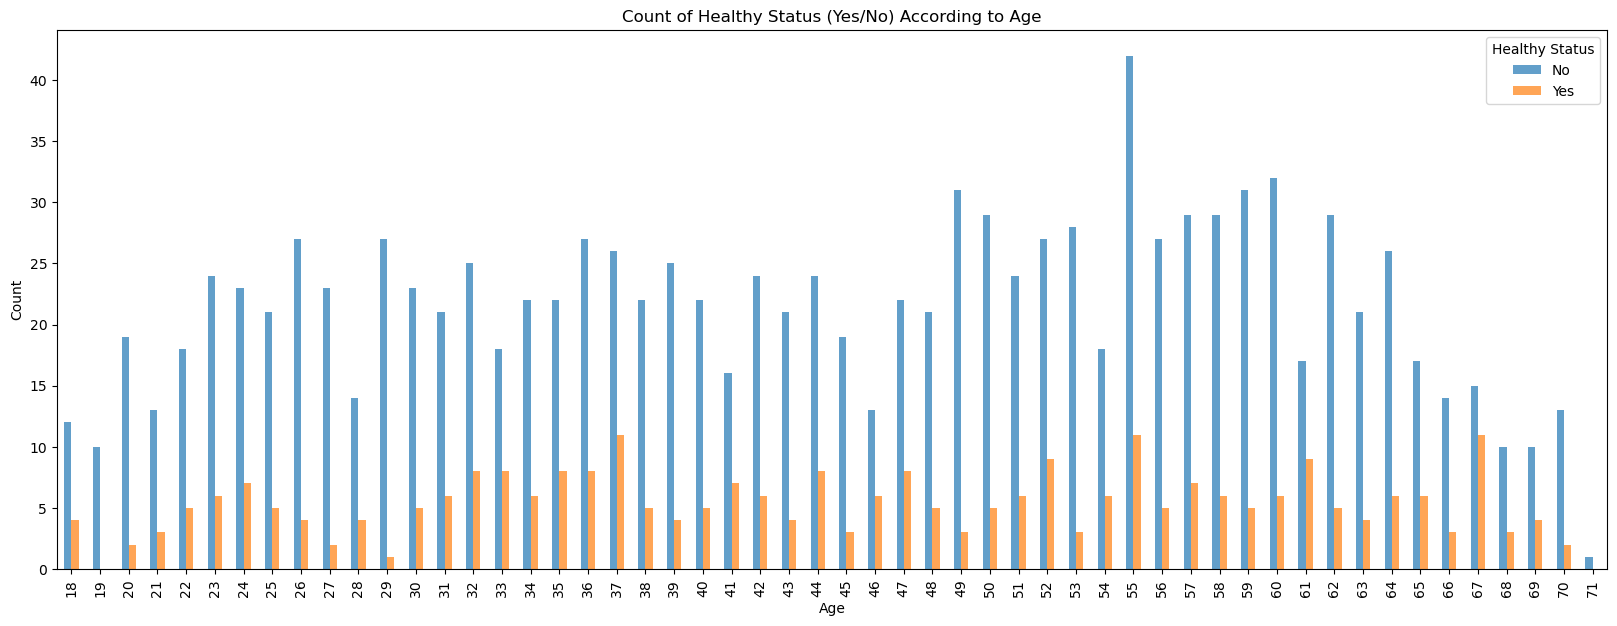

In [20]:
# Grouped bar chart
healthy_count.plot(kind='bar', alpha=0.7, figsize=(20,7))

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count of Healthy Status (Yes/No) According to Age")
plt.legend(title="Healthy Status", labels=["No", "Yes"])
plt.show()


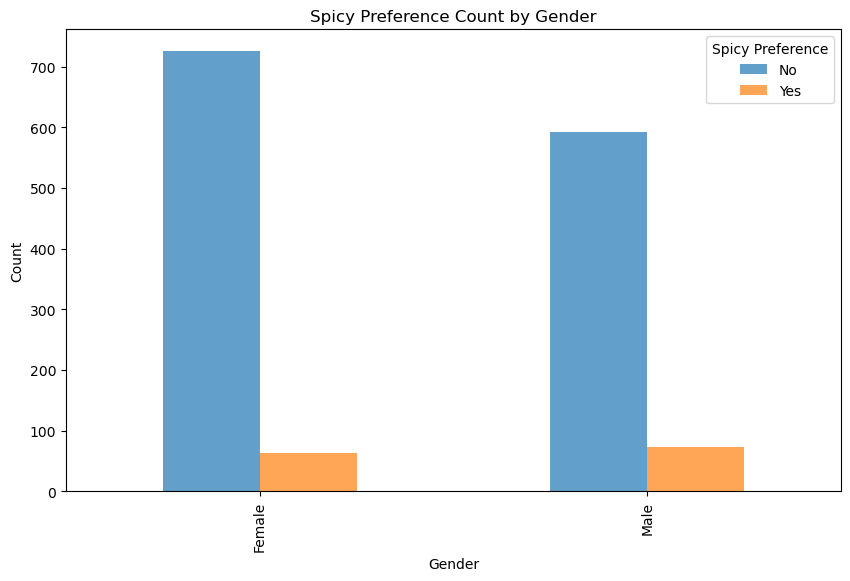

In [26]:
spicy_count = data.groupby(['Gender', 'spicy']).size().unstack(fill_value=0)
spicy_count.plot(kind='bar', figsize=(10,6), alpha=0.7)

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Spicy Preference Count by Gender")
plt.legend(title="Spicy Preference", labels=["No", "Yes"])
plt.show()

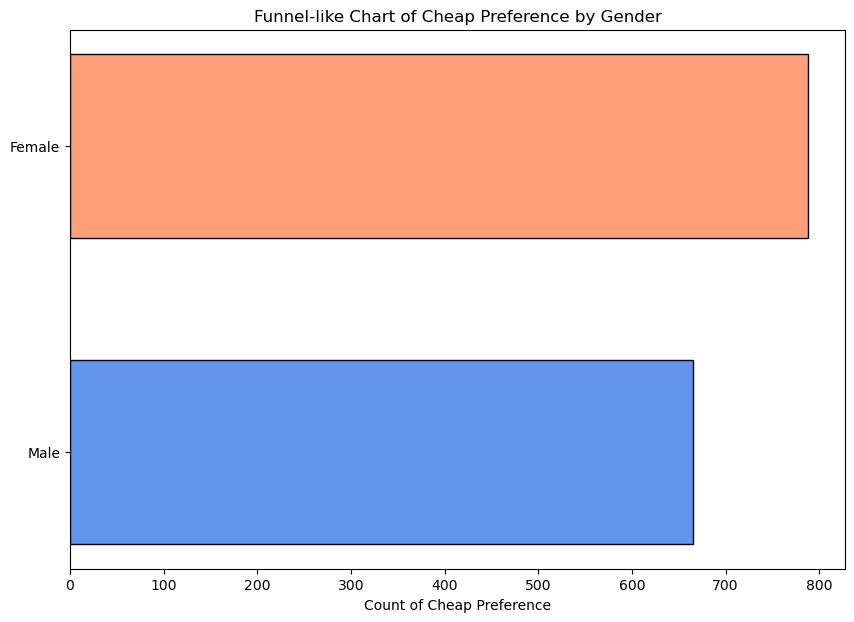

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

cheap_count = data.groupby(['Gender', 'cheap']).size().unstack(fill_value=0)

cheap_total = cheap_count.sum(axis=1)

genders = cheap_total.index
counts = cheap_total.values

plt.figure(figsize=(10,7))
plt.barh(genders, counts, color=['#FFA07A', '#6495ED'], edgecolor='black', height=0.6)

plt.xlabel("Count of Cheap Preference")
plt.title("Funnel-like Chart of Cheap Preference by Gender")
plt.gca().invert_yaxis()  
plt.show()



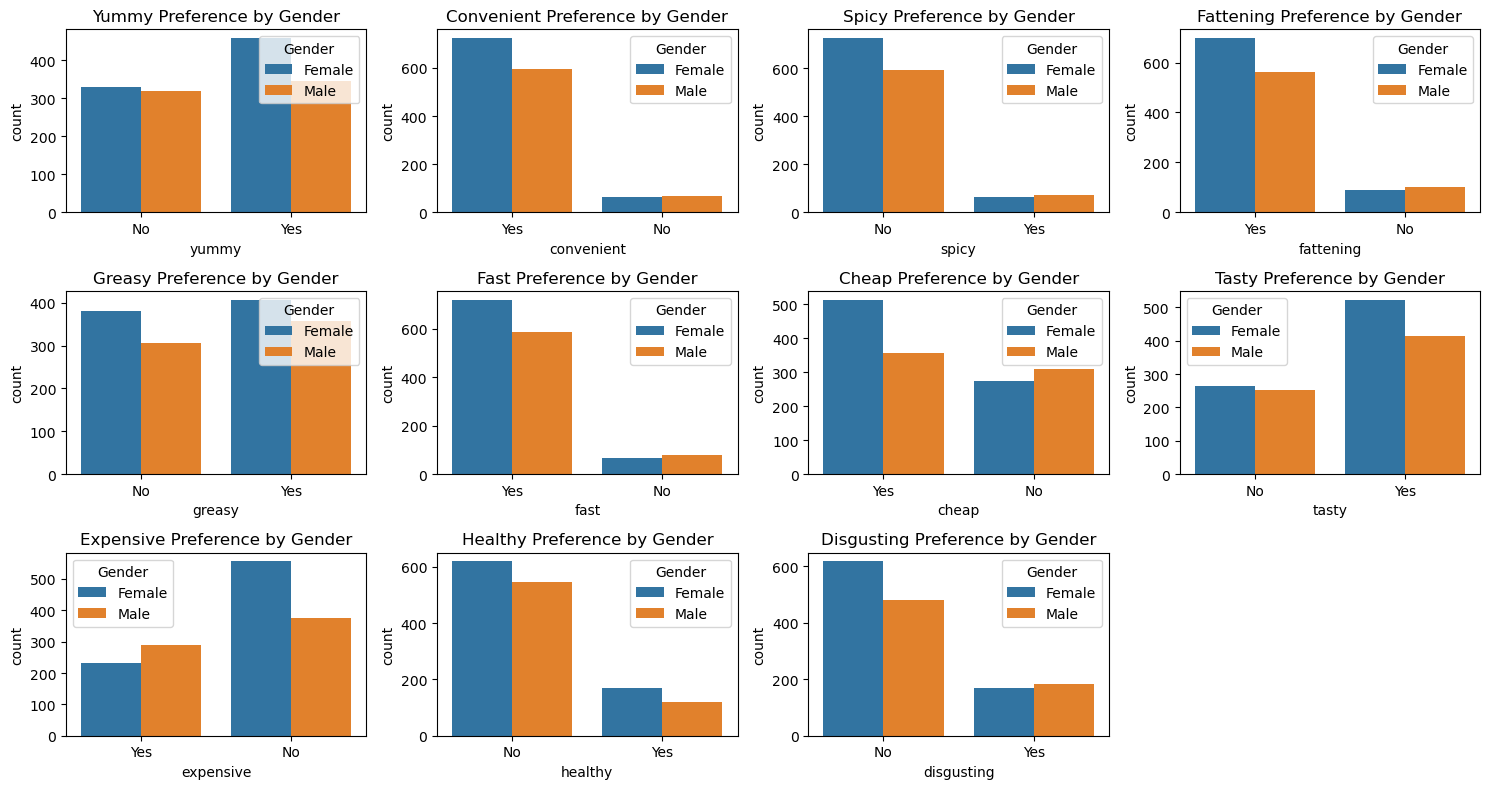

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

preferences = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

plt.figure(figsize=(15,8))
for i, pref in enumerate(preferences, 1):
    plt.subplot(3, 4, i)  
    sns.countplot(x=pref, hue='Gender', data=data)
    plt.title(f'{pref.capitalize()} Preference by Gender')

plt.tight_layout()
plt.show()


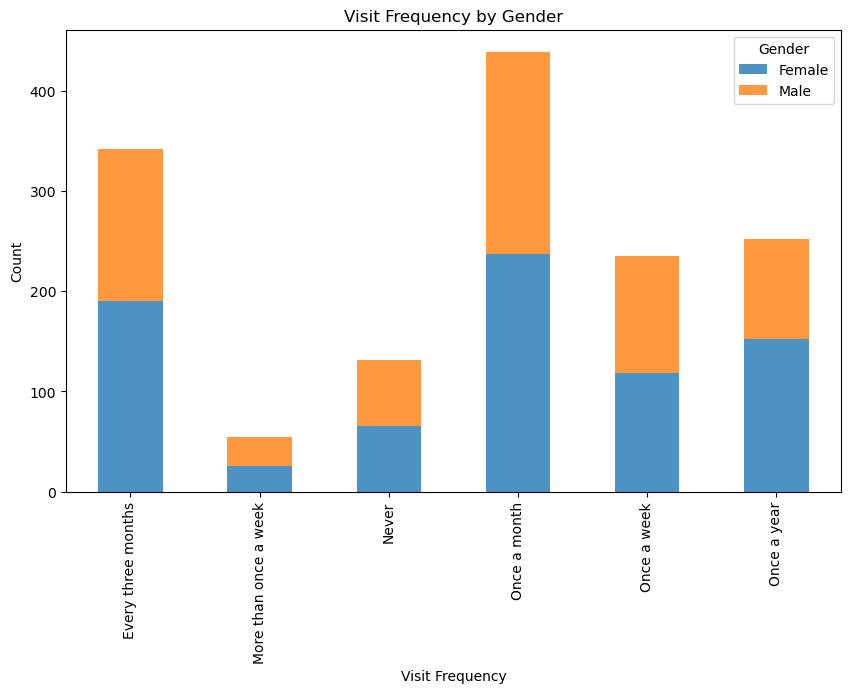

In [36]:

', 'Gender']).size().unstack(fill_value=0)

visit_gender_count.plot(kind='bar', stacked=True, figsize=(10,6), alpha=0.8)
plt.xlabel("Visit Frequency")
plt.ylabel("Count")
plt.title("Visit Frequency by Gender")
plt.show()


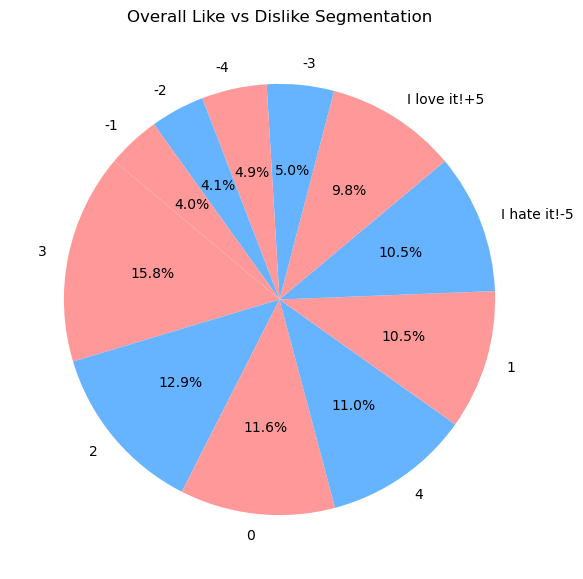

In [38]:

like_count = data['Like'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(like_count, labels=like_count.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title("Overall Like vs Dislike Segmentation")
plt.show()


Unique values in 'convenient': ['Yes' 'No']


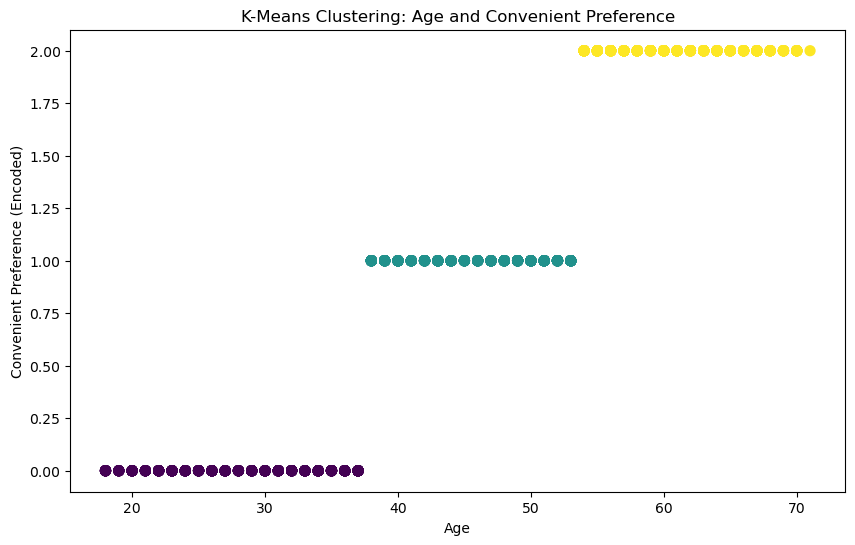

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


preference_columns = [ 'convenient']
for pref in preference_columns:
    print(f"Unique values in '{pref}':", data[pref].unique())

data_encoded = pd.get_dummies(data, columns=preference_columns)
n_clusters = 3 
for pref in preference_columns:
    
    preference_columns_encoded = [col for col in data_encoded.columns if pref in col]
    if preference_columns_encoded:
        
        X = data_encoded[['Age'] + preference_columns_encoded]
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        data[f'{pref}_cluster'] = kmeans.fit_predict(X)
        plt.figure(figsize=(10, 6))
        plt.scatter(data['Age'], data[preference_columns_encoded[0]], c=data[f'{pref}_cluster'], cmap='viridis', s=50)
        plt.title(f'K-Means Clustering: Age and {pref.capitalize()} Preference')
        plt.xlabel('Age')
        plt.ylabel(f'{pref.capitalize()} Preference (Encoded)')
        plt.show()
 


In [229]:

def extract_numeric(value):
    if isinstance(value, str):
        if 'love' in value.lower():
            return 5
        elif 'hate' in value.lower():
            return -5
    return pd.to_numeric(value, errors='coerce')  

df['Like_numeric'] = df['Like'].apply(extract_numeric)

df.dropna(subset=['Like_numeric'], inplace=True)
data_model = df[['Age', 'Like_numeric']]


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

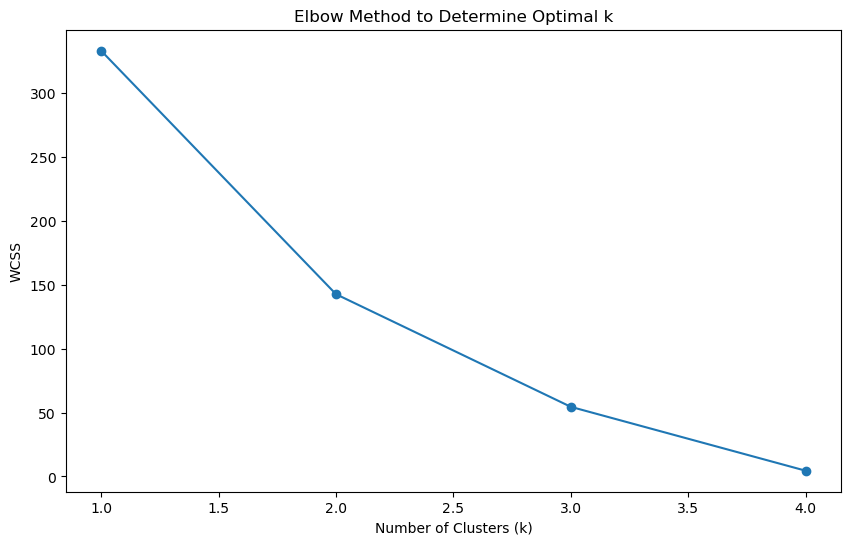

In [187]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


n_samples = data_model.shape[0]  
max_k = min(15, n_samples)

wcss = [] 

for k in range(1, max_k):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1, max_k), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


DataFrame Head:
   yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No    2   51  Every three months  Female  
2         No    1   62  Every three months  Female  
3        Yes    4   69         Once a week  Female  
4         No    2   49        Once a month    Male  
DataFrame Columns: Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFreq

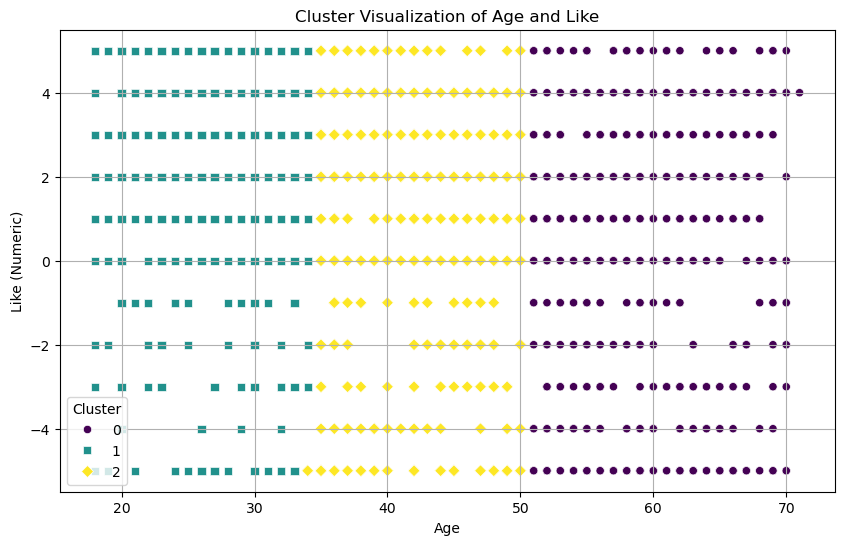

In [223]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


print("DataFrame Head:\n", data.head())
print("DataFrame Columns:", data.columns)


if 'Age' not in data.columns or 'Like' not in data.columns:
    print("Available columns:", data.columns)
    raise KeyError("One or both of the required columns ('Age', 'Like') are not found in the DataFrame.")


def convert_like(value):
    if isinstance(value, str):
        if value == "I love it!+5":
            return 5
        elif value == "I hate it!-5":
            return -5
    try:
        return float(value)
    except ValueError:
        return np.nan  

data['like_numeric'] = data['Like'].apply(convert_like)

data.dropna(subset=['like_numeric'], inplace=True)

X = data[['Age', 'like_numeric']]

kmeans = KMeans(n_clusters=3)  
data['cluster'] = kmeans.fit_predict(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='like_numeric', hue='cluster', palette='viridis', style='cluster', markers=['o', 's', 'D'])
plt.title('Cluster Visualization of Age and Like')
plt.xlabel('Age')
plt.ylabel('Like (Numeric)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


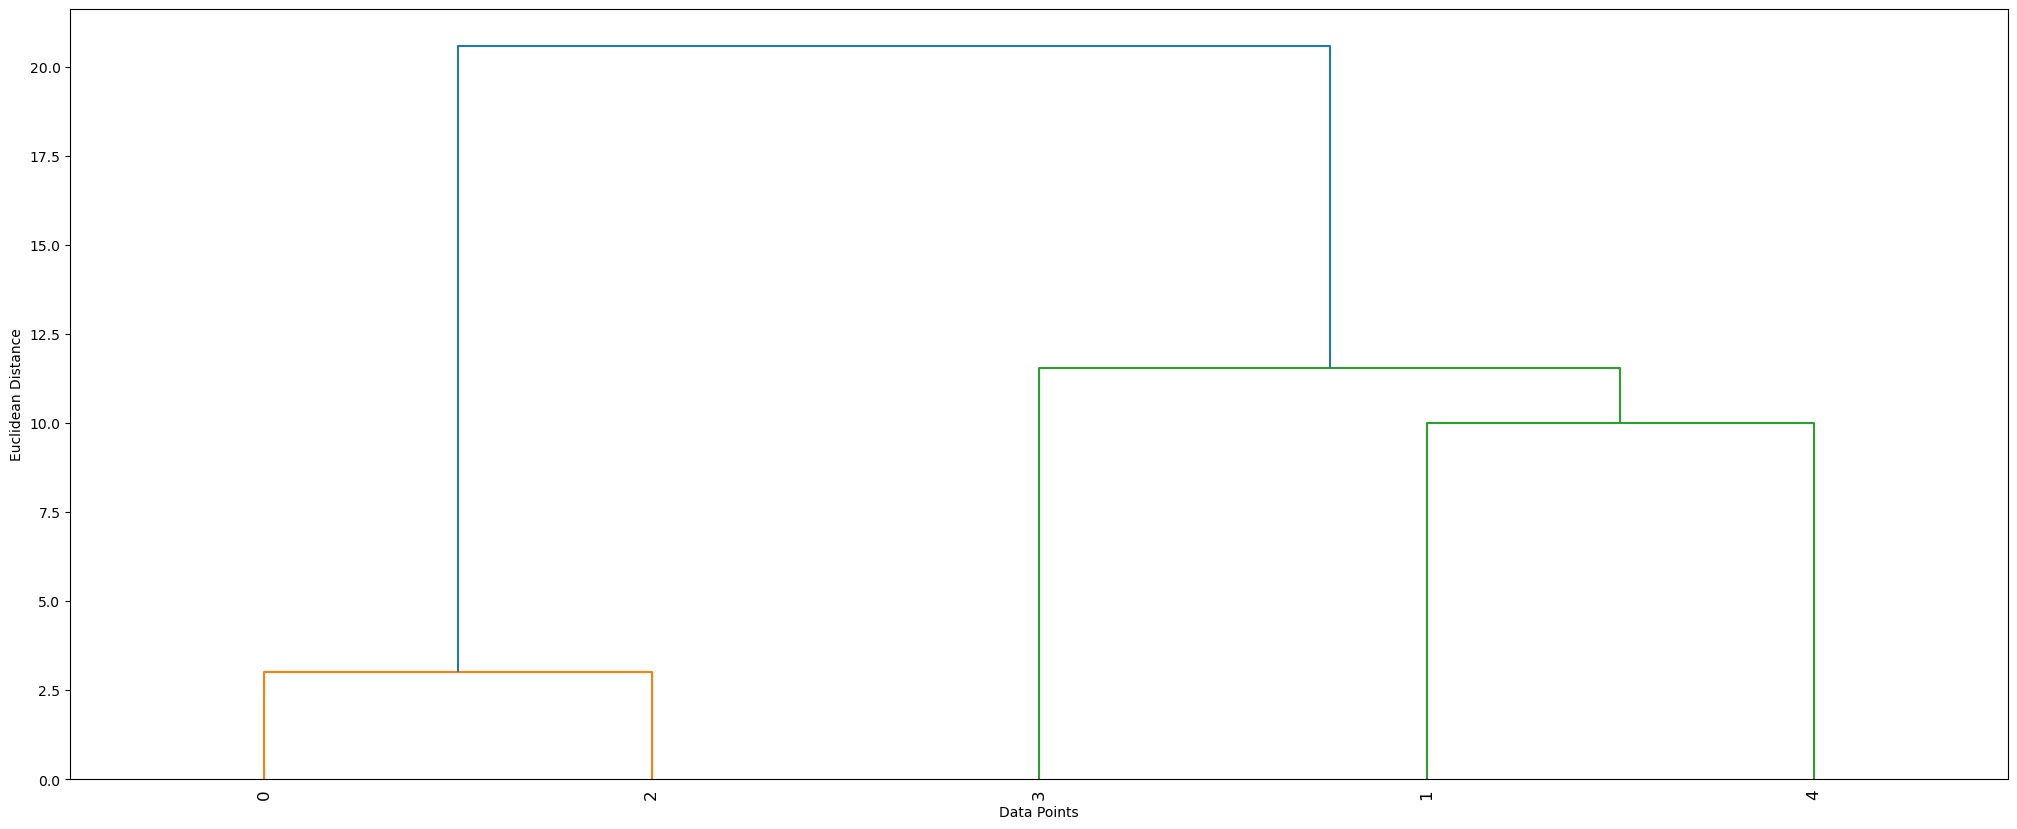

In [231]:
if data_model.empty:
    print("Data model is empty! Check your data extraction process.")
else:
    from scipy.cluster.hierarchy import linkage, dendrogram
    import matplotlib.pyplot as plt

    merg = linkage(data_model, method="ward")
    plt.figure(figsize=(25, 10))
    dendrogram(merg, leaf_rotation=90)
    plt.xlabel("Data Points")
    plt.ylabel("Euclidean Distance")
    plt.show()